In [36]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping,LearningRateScheduler
import numpy as np
import tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2,l1

In [20]:
train_dir = r"C:/Users/HP/siim/testandtrain/train"
test_dir = r'C:/Users/HP/siim/testandtrain/test'

In [21]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(128,128),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(128,128),
                                                batch_size=32,
                                                class_mode = "binary")

Found 16047 images belonging to 2 classes.
Found 1876 images belonging to 2 classes.


In [22]:
model1 = Sequential()
model1.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))
model1.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])

In [23]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [24]:
history = model1.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
502/502 [==============================] - 565s 1s/step - loss: 0.2911 - accuracy: 0.8797 - val_loss: 0.1425 - val_accuracy: 0.9595
Epoch 2/15
502/502 [==============================] - 643s 1s/step - loss: 0.2114 - accuracy: 0.9093 - val_loss: 0.0540 - val_accuracy: 0.9867
Epoch 3/15
502/502 [==============================] - 642s 1s/step - loss: 0.1831 - accuracy: 0.9189 - val_loss: 0.0825 - val_accuracy: 0.9760
Epoch 4/15
502/502 [==============================] - 642s 1s/step - loss: 0.1692 - accuracy: 0.9238 - val_loss: 0.0380 - val_accuracy: 0.9931
Epoch 5/15
502/502 [==============================] - 641s 1s/step - loss: 0.1567 - accuracy: 0.9288 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 6/15
502/502 [==============================] - 651s 1s/step - loss: 0.1512 - accuracy: 0.9315 - val_loss: 0.0730 - val_accuracy: 0.9776
Epoch 7/15
502/502 [==============================] - 678s 1s/step - loss: 0.1445 - accuracy: 0.9340 - val_loss: 0.0706 - val_accuracy: 0.9760

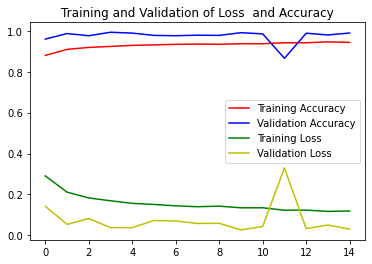

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [26]:
model1.save("pneumosvm-1.h5")

In [27]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model1.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model1.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (1876, 128, 128, 3)
Total number of labels: (1876, 2)
59/59 [==============================] - 17s 293ms/step - loss: 1.0982 - accuracy: 0.5000
Loss on test set:  1.0981889963150024
Accuracy on test set:  0.5
(1876,)
(1876,)


array([[1876]], dtype=int64)

In [28]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")

model_4 = Sequential()
model_4.add(Conv2D(256, kernel_size=(3, 3),activation='relu',input_shape=(128, 128, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(1024, activation='relu'))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))
model_4.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])

In [29]:
history =model_4.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
502/502 [==============================] - 1580s 3s/step - loss: 0.3330 - accuracy: 0.8551 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 2/15
502/502 [==============================] - 1500s 3s/step - loss: 0.2304 - accuracy: 0.9005 - val_loss: 0.1166 - val_accuracy: 0.9515
Epoch 3/15
502/502 [==============================] - 1506s 3s/step - loss: 0.2087 - accuracy: 0.9060 - val_loss: 0.1373 - val_accuracy: 0.9456
Epoch 4/15
502/502 [==============================] - 1389s 3s/step - loss: 0.2094 - accuracy: 0.9052 - val_loss: 0.1901 - val_accuracy: 0.9104
Epoch 5/15
502/502 [==============================] - 1407s 3s/step - loss: 0.2040 - accuracy: 0.9050 - val_loss: 0.0582 - val_accuracy: 0.9749
Epoch 6/15
502/502 [==============================] - 1447s 3s/step - loss: 0.1897 - accuracy: 0.9118 - val_loss: 0.1316 - val_accuracy: 0.9510
Epoch 7/15
502/502 [==============================] - 1479s 3s/step - loss: 0.1858 - accuracy: 0.9133 - val_loss: 0.1339 - val_accuracy:

In [30]:
model_4.save("pneumosvm-2.h5")

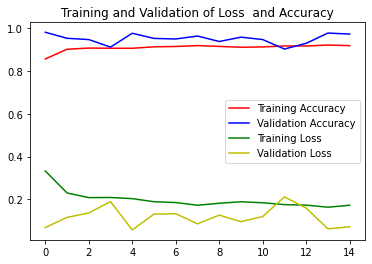

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [34]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model_4.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model_4.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (1876, 128, 128, 3)
Total number of labels: (1876, 2)
59/59 [==============================] - 36s 611ms/step - loss: 1.0221 - accuracy: 0.5000
Loss on test set:  1.0221173763275146
Accuracy on test set:  0.5
(1876,)
(1876,)


array([[1876]], dtype=int64)

In [45]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(128,128,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))
model.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 15, 15, 64)      

In [46]:
history =model.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
502/502 [==============================] - 226s 450ms/step - loss: 0.3716 - accuracy: 0.8496 - val_loss: 3.5489 - val_accuracy: 0.0490
Epoch 2/15
502/502 [==============================] - 229s 456ms/step - loss: 0.2819 - accuracy: 0.8899 - val_loss: 2.5480 - val_accuracy: 0.1509
Epoch 3/15
502/502 [==============================] - 224s 447ms/step - loss: 0.2662 - accuracy: 0.8958 - val_loss: 0.0952 - val_accuracy: 0.9813
Epoch 4/15
502/502 [==============================] - 223s 444ms/step - loss: 0.2505 - accuracy: 0.9032 - val_loss: 0.2143 - val_accuracy: 0.9568
Epoch 5/15
502/502 [==============================] - 225s 447ms/step - loss: 0.2480 - accuracy: 0.9038 - val_loss: 0.0874 - val_accuracy: 0.9819
Epoch 6/15
502/502 [==============================] - 222s 443ms/step - loss: 0.2310 - accuracy: 0.9103 - val_loss: 0.0888 - val_accuracy: 0.9813
Epoch 7/15
502/502 [==============================] - 223s 445ms/step - loss: 0.2203 - accuracy: 0.9162 - val_loss: 0.0281 -

In [47]:
model.save("pneumosvm-3.h5")

In [60]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (1876, 128, 128, 3)
Total number of labels: (1876, 2)
59/59 [==============================] - 3s 44ms/step - loss: 2.1427 - accuracy: 0.5000
Loss on test set:  2.1427392959594727
Accuracy on test set:  0.5
(1876,)
(1876,)


array([[1876]], dtype=int64)

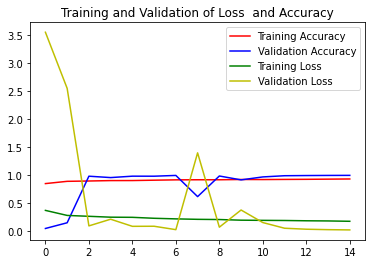

In [49]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

# Knowledge distillation

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [54]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [55]:
# Create the teacher
teacher = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 3)),
        layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
        layers.Conv2D(512, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(2),
    ],
    name="teacher",
)

# Create the student
student = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 3)),
        layers.Conv2D(16, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(2),
    ],
    name="student",
)

# Clone student for later comparison
student_scratch = keras.models.clone_model(student)

In [59]:
# Train teacher as usual
teacher.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

# Train and evaluate teacher on data.
teacher.fit(training_set,test_set,epochs=5)


ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.